## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input


## Load and Preprocess the Dataset

In [2]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## Build the Model


In [3]:
model = Sequential()

# Add the input layer
model.add(Input(shape=(28, 28, 1)))

# Add the subsequent layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Training The Model

In [4]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7221 - loss: 0.8423 - val_accuracy: 0.9728 - val_loss: 0.0864
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9536 - loss: 0.1536 - val_accuracy: 0.9843 - val_loss: 0.0493
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9673 - loss: 0.1081 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9730 - loss: 0.0897 - val_accuracy: 0.9873 - val_loss: 0.0340
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9759 - loss: 0.0788 - val_accuracy: 0.9882 - val_loss: 0.0328
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9799 - loss: 0.0664 - val_accuracy: 0.9889 - val_loss: 0.0305
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9826 - loss: 0.0578 - val_accuracy: 0.9883 - val_loss: 0.0308
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9833 - loss: 0.0542 - val_accu

## Evaluating the Model

In [5]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')


Test loss: 0.02504083700478077
Test accuracy: 0.9918000102043152


## Visualize the Results

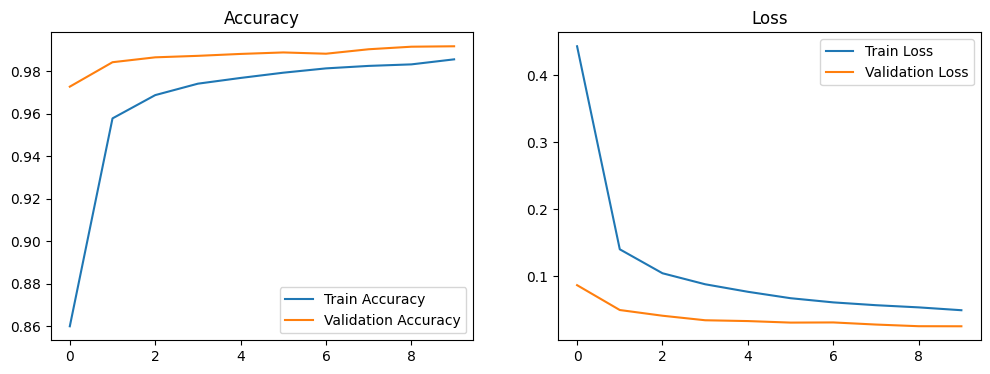

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
